In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:////Users/samuelgiddins/desktop/sqlalchemy-challenge/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
#add filters to extrat last 12 months of the data
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date <= '2017-08-23').filter(Measurement.date >= '2016-08-23')

In [12]:
#put raw data into DF
df = pd.DataFrame(results)

In [13]:
#group by date and return the mean
prcp_df = df.groupby('date').mean()
prcp_df

,prcp
date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667
2016-08-29,0.243333
2016-08-30,0.011667
2016-08-31,0.636000


In [14]:
#prep data for plot
plot_df = prcp_df.reset_index()

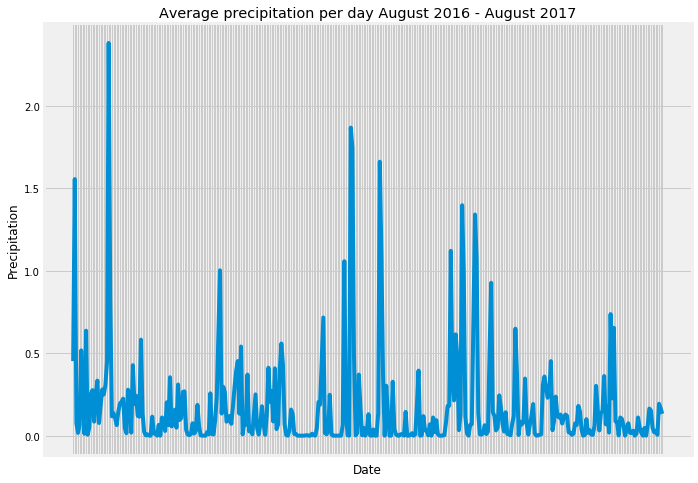

In [15]:
#plot results
ax2 = plt.axes([0, 1.5, 1.5, 1.5])
plt.plot(plot_df["date"], plot_df["prcp"])
plt.grid(True)
plt.title("Average precipitation per day August 2016 - August 2017")
plt.xlabel("Date") 
plt.xticks(plot_df["date"], rotation=90, ha="right")
plt.ylabel("Precipitation")
ax2.set_xticklabels([])

plt.show()

In [16]:
#print summary statistics
#1. mean
print(prcp_df)

                prcp
date                
2016-08-23  0.451667
2016-08-24  1.555000
2016-08-25  0.077143
2016-08-26  0.016667
2016-08-27  0.064000
2016-08-28  0.516667
2016-08-29  0.243333
2016-08-30  0.011667
2016-08-31  0.636000
2016-09-01  0.006000
2016-09-02  0.050000
2016-09-03  0.254000
2016-09-04  0.276000
2016-09-05  0.085000
2016-09-06  0.246000
2016-09-07  0.333333
2016-09-08  0.076667
2016-09-09  0.178333
2016-09-10  0.280000
2016-09-11  0.250000
2016-09-12  0.308000
2016-09-13  0.451667
2016-09-14  2.380000
2016-09-15  0.826667
2016-09-16  0.117143
2016-09-17  0.136000
2016-09-18  0.106000
2016-09-19  0.064000
2016-09-20  0.147143
2016-09-21  0.195000
...              ...
2017-07-25  0.087143
2017-07-26  0.083333
2017-07-27  0.001667
2017-07-28  0.110000
2017-07-29  0.101667
2017-07-30  0.060000
2017-07-31  0.000000
2017-08-01  0.046667
2017-08-02  0.075000
2017-08-03  0.017500
2017-08-04  0.015000
2017-08-05  0.030000
2017-08-06  0.000000
2017-08-07  0.012500
2017-08-08  0

In [17]:
#2. sum
print(prcp_df.sum())

prcp    62.497024
dtype: float64


In [18]:
#3. min
print(prcp_df.min())

prcp    0.0
dtype: float64


In [19]:
#4. max
print(prcp_df.max())

prcp    2.38
dtype: float64


In [20]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [21]:
#print station columns
from sqlalchemy import inspect
inst = inspect(Station)
attr_names = [c_attr.key for c_attr in inst.mapper.column_attrs]
print(attr_names)

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']


In [22]:
#print measurement columns
from sqlalchemy import inspect
inst = inspect(Measurement)
attr_names = [c_attr.key for c_attr in inst.mapper.column_attrs]
print(attr_names)

['id', 'station', 'date', 'prcp', 'tobs']


In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

# Most active stations
from sqlalchemy import desc
most_stations = session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
most_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [35]:
#lowest recorded temperature for most acit
min_temp = session.query(Measurement.id, Measurement.station, func.min(Measurement.tobs)).filter(Measurement.station=="USC00519281").group_by(Measurement.id).order_by(func.min(Measurement.tobs)).first()
min_temp

(13294, 'USC00519281', 54.0)

In [36]:
#max temperature for most active station
max_temp = session.query(Measurement.id, Measurement.station, func.max(Measurement.tobs)).filter(Measurement.station=="USC00519281").group_by(Measurement.id).order_by(func.max(Measurement.tobs).desc()).first()
max_temp

(14261, 'USC00519281', 85.0)

In [26]:
#avg temperature for most active station
avg_temp = session.query(Measurement.id, Measurement.station, func.avg(Measurement.tobs)).filter(Measurement.station=="USC00519281").group_by(Measurement.id).first()
avg_temp

(12188, 'USC00519281', 70.0)

In [29]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#first, get the temperature data into a df to prep for plot
tobs_hist = session.query(Measurement.tobs, func.count(Measurement.tobs)).filter(Measurement.station=="USC00519281").group_by(Measurement.tobs).all()
tobs_hist
temp_list = [r[0] for r in tobs_hist]
count_list = [r[1] for r in tobs_hist]

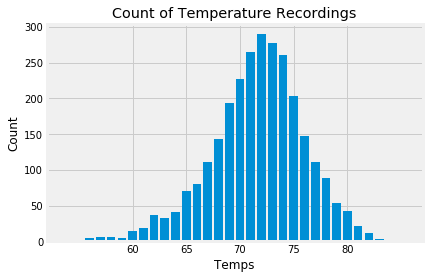

In [30]:
#plot results
ax = plt.subplots()
x = [60, 65, 70, 75, 80]
plt.bar(tobs_temp_df['temps'], tobs_temp_df['counts'])
plt.grid(True)
plt.title("Count of Temperature Recordings")
plt.xlabel("Temps") 
plt.xticks(x)
plt.ylabel("Count")
ax2.set_xticklabels([])

plt.show()

In [31]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [32]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2011-02-28', '2011-03-05'))

[(61.0, 69.75510204081633, 75.0)]


In [52]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
#plot results


SyntaxError: can't assign to function call (<ipython-input-52-e15b9569aa2e>, line 6)

In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


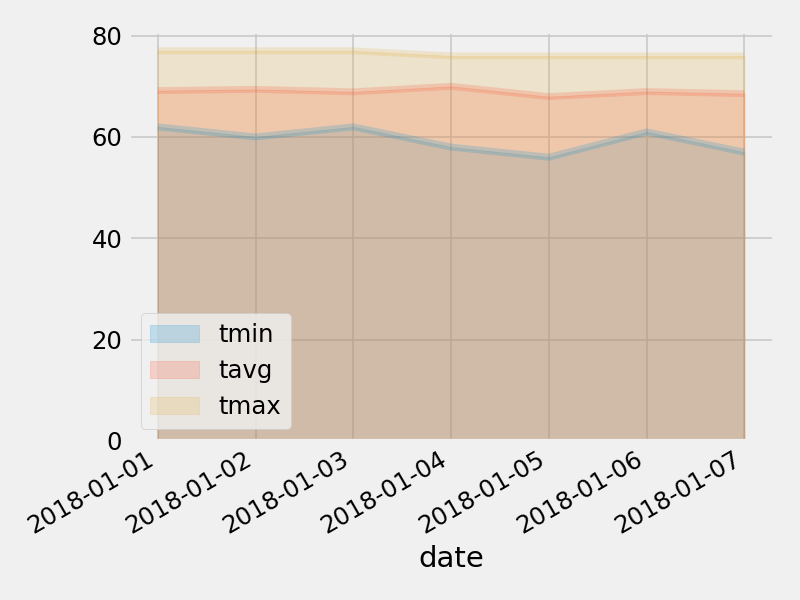

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
